<h1 align="center"><font size="12">Real Estate Price Prediction</font></h1> 

![-----------------------------------------------------------------------------------------------------------------](https://raw.githubusercontent.com/andreasbm/readme/master/assets/lines/rainbow.png)

In [1]:
import pandas as pd     ## Importing Modules
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,4)  ## Setting size of figures globally

<h1 align="center"><font size="5">Understanding your data</font></h1> 

In [2]:
df = pd.read_csv('train.csv')     # Loading the data
test = pd.read_csv('test.csv')     # Test data, where we need to predict the result of our model
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


$$\underline{\textbf{Data Description}}$$

$\textbf{area_type}$ : area type of the house (helps in determining area of house)\
$\textbf{availabiltiy}$ : date of house availability (Ready To Move, date given) \
$\textbf{location}$ : location of house in Bangalore \
$\textbf{size}$  : Size of house (2 BHK, 3 BHK, Others) \
$\textbf{society}$ : society in which house is located \
$\textbf{total_sqft}$ : area (in sqft) \
$\textbf{bath}$ : Number of bathrooms \
$\textbf{balcony}$ : Number of balcony/balconies \
$\textbf{price}$ : (Target) Price of house (in lakhs INR)

In [4]:
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} features/columns')

Our data has 13320 rows and 9 features/columns


In [5]:
# Datatype Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


* It can be observed that __some columns have missing values__.
* Also, most of them (6 out of 9) seem to be __categorical columns__.

In [6]:
# Checking for missing values

(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

society         41.306306
balcony          4.572072
bath             0.548048
size             0.120120
location         0.007508
area_type        0.000000
availability     0.000000
total_sqft       0.000000
price            0.000000
dtype: float64

* '__society__' has maximum __(~41%)__ missing values, followed by '__balcony__' with __(4.57%)__ missing values.
* Other columns such as '__location__', '__size__' and '__bath__' have small proporations of missing values.
* We can check further in detail to decide what we want to do with missing data as we want to avoid data loss as much as possible.

In [7]:
# Duplicate Values
df.duplicated().sum()

529

In [8]:
test.duplicated().sum()    ## test data also has duplicate values

33

In [9]:
df[df.duplicated()]   # Checking values which are duplicate

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [10]:
df.drop_duplicates(inplace=True) # Dropping the duplicates

In [11]:
test.drop_duplicates(inplace=True) # Repeating for test

In [12]:
df.duplicated().sum()        # Confirming whether duplicates are removed or not

0

In [13]:
test.duplicated().sum()

0

<AxesSubplot: >

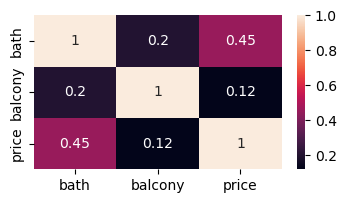

In [14]:
# Correlation
plt.figure(figsize=(4,2))
sns.heatmap(df.corr(numeric_only=True),annot=True)

* **'Number of bathrooms'** has high degree of correlation **(0.46)** with our target variable, i.e., **Price**.
* **Balcony** (number of balcony) has comparatively low degree of correlation with target variable.

<h1 align="center"><font size="5">EXPLORATORY DATA ANALYSIS</font></h1> 

***
*UNIVARIATE ANALYSIS*
***

In [15]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

* It can be observed that **'total_sqft'** has wrong datatype, let us convert it into float

In [16]:
#df['total_sqft'] = df['total_sqft'].astype('float')

* The command above is giving an error due to presence of **numerical inaccuracies**, thus we will have to undergo **data-cleaning** before any analysis.
* Or a better approach is cleaning the column and analysing it at the same time and at the end we would summarise findings from univariate analysis for each column. (except for columns where optimum value for best model accuracy needs to be adjusted)

In [17]:
cat_cols = df.select_dtypes(include=['object'])      # Categorical Columns
num_cols = df.select_dtypes(exclude=['object'])      # Numerical Columns

# We will make all the changes in 'df' directly

In [18]:
cat_cols.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

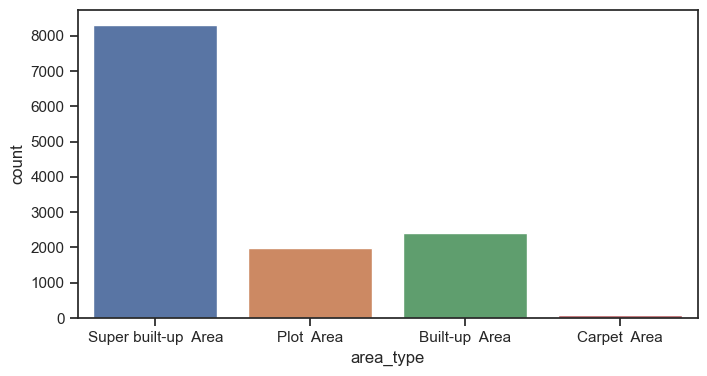

In [19]:
# 1. Area Type
sns.set_theme(style="ticks")
sns.countplot(x='area_type', data=df)
df['area_type'].value_counts()

* Maximum number of values belong to **Super built-up Area**, followed by **Built-up Area**, **Plot Area** and **Carpet Area**.
* Since there are way to less values in **Carpet Area**, we can combine it with **Plot Area** to consider them as a single category.
* We can further check the dependency of **Price** (target) on **area type** to check whether a particular **area_type** is significantly different from the other.

In [20]:
df['area_type'] = df.area_type.replace('Carpet  Area', 'Plot  Area')
df['area_type'].value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              2076
Name: area_type, dtype: int64

In [21]:
test['area_type'] = test.area_type.replace('Carpet  Area', 'Plot  Area')   # Repeating for the test data
test['area_type'].value_counts()

Super built-up  Area    918
Built-up  Area          267
Plot  Area              262
Name: area_type, dtype: int64

In [22]:
# 2. Availablility
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [23]:
df['availability'].value_counts(normalize=True)*100

Ready To Move    79.524666
18-May            2.282855
18-Dec            2.220311
18-Apr            2.103041
18-Aug            1.461965
                   ...    
16-Oct            0.007818
15-Dec            0.007818
15-Jun            0.007818
16-Jul            0.007818
14-Jul            0.007818
Name: availability, Length: 81, dtype: float64

* Majority of houses are **Ready To Move (~80%)** and rest of data is scattered into different dates across the year.
* All the data (except "Ready To Move") can be considered as different category as it too small (combined **20%**) when compared.
* Check whether the properties which are **Ready to Move** higher in price than rest.

In [24]:
## Modifying the column

df['availability'] = np.where(df['availability'] == 'Ready To Move', 'Ready To Move', 'Other Day')
df['availability'].value_counts()

Ready To Move    10172
Other Day         2619
Name: availability, dtype: int64

In [25]:
# Repeating the aboce step for test data
test['availability'] = np.where(test['availability'] == 'Ready To Move', 'Ready To Move', 'Other Day')
test['availability'].value_counts()

Ready To Move    1138
Other Day         309
Name: availability, dtype: int64

In [26]:
# 3: Location
len(df['location'].unique())
df['location']=df['location'].astype('str').apply(lambda x: x.strip())    # strip method removes any extra spaces from start and end

In [27]:
# Repating for test data
test['location']=test['location'].astype('str').apply(lambda x: x.strip())    # strip method removes any extra spaces from start and end

In [28]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [29]:
loc_count = df['location'].value_counts()

In [30]:
len(loc_count[loc_count <= 10])  

## There are numerous location which have count less than 10, let us make them a separate category called 'Other Location'

1062

In [31]:
loc_other = loc_count[loc_count <= 10]
loc_other

Gunjur Palya              10
Nagadevanahalli           10
Nagappa Reddy Layout      10
Pattandur Agrahara        10
Dairy Circle              10
                          ..
Papareddipalya             1
1Channasandra              1
Vijayabank bank layout     1
Hosahalli                  1
Abshot Layout              1
Name: location, Length: 1062, dtype: int64

In [32]:
## Finally let us apply the operation in the 'location' column

df['location'] = df['location'].apply(lambda x: 'Other Location' if x in loc_other else x)
df['location'].value_counts()

Other Location      2934
Whitefield           524
Sarjapur  Road       379
Electronic City      289
Kanakpura Road       249
                    ... 
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 234, dtype: int64

In [33]:
for_test = set(list(df['location']))   ## Applying similar operation on the test data

test['location'] = test['location'].apply(lambda x: 'Other Location' if x not in for_test else x)

In [34]:
test['location'].value_counts()

Other Location           361
Whitefield                50
Thanisandra               42
Sarjapur  Road            38
Electronic City           33
                        ... 
Banashankari Stage VI      1
Chikkabanavar              1
Giri Nagar                 1
Nagavarapalya              1
AECS Layout                1
Name: location, Length: 205, dtype: int64

* After Model builiding and checking the accuracy, we may comeback to change threshold value (here 10) and see if that improves performance.
* Further, it can be checked **<u>if average price of properties is more in particular locations</u>**.

In [35]:
test.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [36]:
# 4: Size
cat_cols['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [37]:
cat_cols['size'].isnull().sum()
#cat_cols['size'].value_counts()

16

* **'size'** column has multiple unique values but **'BHK'** and **'Bedroom'** have been used synonymously. 
* Create a separate column with only **integer values from 'size'** column and simply drop size column later.
* Impute missing value using appropriate measure of central tendency of the distribution (in this case, Mode as feature is categorical).
* Check for relationship of price with this column as **more frequent BHKs** may have higher price due to demand-and-supply.

In [38]:
df['size'].fillna('2 BHK', inplace = True)     ## As '2 BHK' is most-frequent value
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))   ## Taking first element after splitting 'size' string

# As we are expecting similar behaviour in our test data, which can be clearly seen using mode value in test data for 'Size' column
# WE are going to repeat the above steps.

test['size'].fillna('2 BHK', inplace = True)     ## As '2 BHK' is most-frequent value
test['size'] = test['size'].apply(lambda x: int(x.split(' ')[0]))   ## Taking first element after splitting 'size' string

In [39]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Other Day,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [40]:
cat_cols.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [41]:
# 5: Society
len(cat_cols['society'].unique())

2689

In [42]:
soc_count = df['society'].value_counts()
soc_count

GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [43]:
soc_other = soc_count[soc_count <= 10]
soc_other

SPavenc    10
NDionas    10
Saityat    10
AsNowre    10
Prldsri    10
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: society, Length: 2575, dtype: int64

In [44]:
df['society'] = df['society'].apply(lambda x: 'Other Society' if x in soc_other else x)
df['society'].value_counts()

# Repeating the step above for test data
for_test = set(list(df['society']))   ## Applying similar operation on the test data

test['society'] = test['society'].apply(lambda x: 'Other Society' if x not in for_test else x)

* For **'society'** column, we have followwed similar process which we are going to follow for **'location'** column (discussed earlier)
* Further perform missing value treatment on this column probably using appropriate method.
* Look for relationship between **target** and **'society'** to see if they have a correlation, it would be helpful later in feature selection.
* We may drop the column completely if it does not have that relevance to target. 

In [45]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.000000
size             0.000000
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [46]:
# 6: total_sqft has been misclassified as a categorical column, we will just convert it into float or int depending on the values present.

cat_cols['total_sqft'].unique()
cat_cols['total_sqft'].value_counts()

1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: total_sqft, Length: 2117, dtype: int64

* From above, it can be seen that we cannot convert this column directly to **numerical (int or float)**
* For the value which are in ranges **(ex: 2563-2733, 605-624)**, we will replace these values with respective mean of range.

In [47]:
test.dtypes

area_type        object
availability     object
location         object
size              int64
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [48]:
# First let us have a look at all these type of values
# As total sqft is a float value wrongly in string datatype, let us define a custom functions to check whether a value is float or not

def is_float(x):
    try:
        float(x)      # checks float operation on the value
    except:
        return False        # if try block does not run, False is returned by the function
    return True       # if try block works fine, True is returned

cat_cols[~cat_cols['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,society,total_sqft
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440


In [49]:
test[~test['total_sqft'].apply(is_float)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
42,Super built-up Area,Ready To Move,Sarjapur Road,3,Klark L,1691 - 2170,3.0,0.0,NaN
151,Plot Area,Other Day,Other Location,2,Other Society,1200 - 2000,NaN,NaN,NaN
174,Super built-up Area,Other Day,Yelahanka,3,Other Society,1892 - 2798,3.0,0.0,NaN
180,Super built-up Area,Other Day,Whitefield,1,Oreldhi,524 - 894,1.0,0.0,NaN
215,Super built-up Area,Other Day,HBR Layout,1,Other Society,534 - 763,1.0,0.0,NaN


* There are **246** such values which are available in range instead of a single value and similar is the case for test data too.
* Some of the values are not even in the form of a range, like, **34.46Sq. Meter, 4125Perch, 1000Sq. Meter**, for these values we just need to take the integer part.

In [50]:
# To convert these values, let us build a custom function

def total_sqft_range(x):
    r = x.split('-')
    
    if len(r)==2:                             ## Runs only for the range values
        return (float(r[0]) + float(r[1]))/2
    try:                                      ## Works for all other values
        return float(x)
    except:                                   ## Handling exceptions, values like 34.46Sq. Meter, 4125Perch etc, become NaN
        return None
        

In [51]:
df['total_sqft'] = df['total_sqft'].apply(total_sqft_range)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Other Day,Electronic City Phase II,2,Other Society,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00


In [52]:
test['total_sqft'] = test['total_sqft'].apply(total_sqft_range)    ## Repeating for the test data also
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Other Day,Electronic City Phase II,2,Other Society,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00


* Now, **total_sqft** column has a proper datatype (for both train and test data), i.e., numerical
* Further, we are going to look into the numerical columns.

In [53]:
df[df['total_sqft'].isnull()].head()     ## Rows where 'total_sqft' is null, 46 rows in total

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1,NaN,NaN,1.0,0.0,18.5
648,Built-up Area,Ready To Move,Arekere,9,NaN,NaN,9.0,NaN,265.0
775,Built-up Area,Ready To Move,Other Location,1,NaN,NaN,2.0,1.0,93.0
872,Super built-up Area,Ready To Move,Other Location,2,NaN,NaN,2.0,NaN,45.0
1019,Plot Area,Other Day,Other Location,1,NaN,NaN,1.0,0.0,110.0


In [54]:
df['total_sqft'].describe()         # Distribution is definitely skewed, so we would be using median for imputing missing values

count    12745.00000
mean      1569.60368
std       1259.83493
min          1.00000
25%       1100.00000
50%       1280.00000
75%       1691.00000
max      52272.00000
Name: total_sqft, dtype: float64

In [55]:
df['total_sqft'].fillna(df['total_sqft'].median(), inplace=True)

- Hence, we have imputed missing values with 'median' of the column as the data is skewed towards right.

In [56]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               0
society          617
total_sqft         2
bath               5
balcony           67
price           1447
dtype: int64

In [57]:
test[test['total_sqft'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
325,Built-up Area,Other Day,Doddaballapur,1,NaN,NaN,1.0,0.0,NaN
874,Built-up Area,Ready To Move,Bisuvanahalli,3,Prityel,NaN,3.0,1.0,NaN


<AxesSubplot: xlabel='total_sqft', ylabel='Density'>

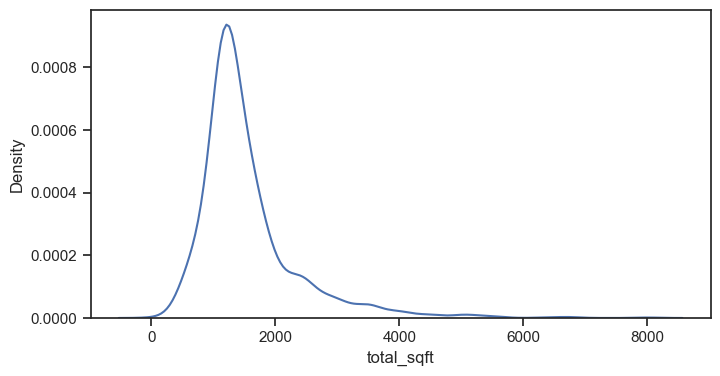

In [58]:
sns.kdeplot(test['total_sqft'])

- The distribtion for 'total_sqft' column for the test data also, is skewed towards right, imputing 1 missing value with median.

In [59]:
test['total_sqft'].fillna(df['total_sqft'].median(), inplace = True)

In [60]:
test.shape

(1447, 9)

**<center>Now, let us perform the analysis for the numerical columns**

In [61]:
num_cols.columns

Index(['bath', 'balcony', 'price'], dtype='object')

<AxesSubplot: >

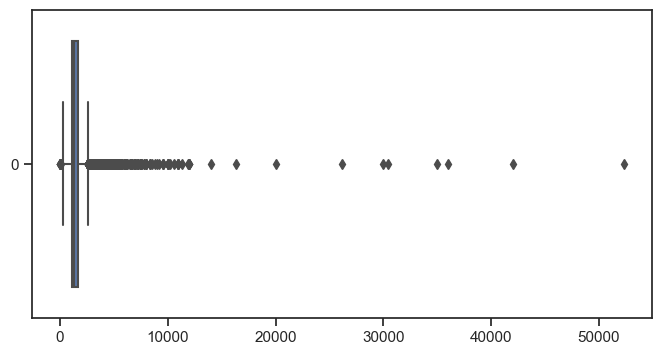

In [62]:
# 1: total_sqft:

# As we already saw in the previous discussion that the total_sqft is a numerical column, we would be applying numerical methods on it
# to udnerstand the variable better.
plt.figure(figsize=(8,4))
sns.boxplot(df['total_sqft'], orient='h')

<AxesSubplot: xlabel='total_sqft', ylabel='Count'>

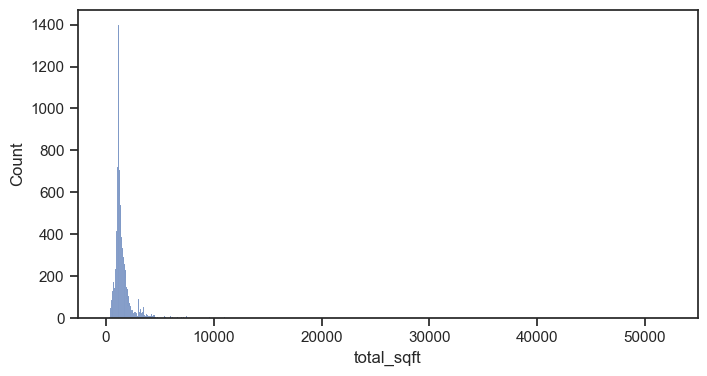

In [63]:
sns.histplot(df['total_sqft'])

In [64]:
df['total_sqft'].describe()

count    12791.000000
mean      1568.562185
std       1257.686848
min          1.000000
25%       1100.000000
50%       1280.000000
75%       1690.000000
max      52272.000000
Name: total_sqft, dtype: float64

* It can be clearly observed from boxplot and histplot as well as statistical summary that **'total_sqft'** is **highly skewed towards right**.
* We may have to apply **log transformation to remove the skewness later**.
* As the distribution is skewed, we will impute the missing values with **median of the data**.

<AxesSubplot: >

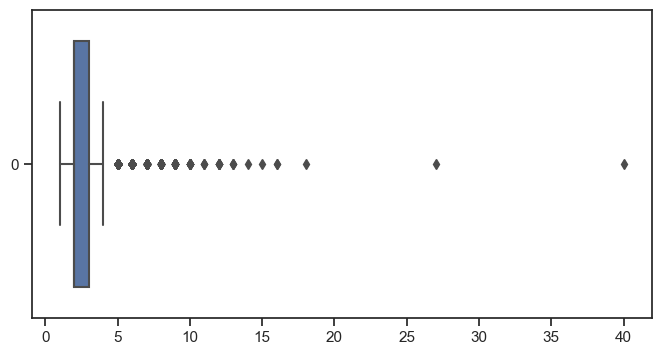

In [65]:
# 2: bath
plt.figure(figsize=(8,4))
sns.boxplot(df['bath'], orient='h')

Text(0, 0.5, 'Count')

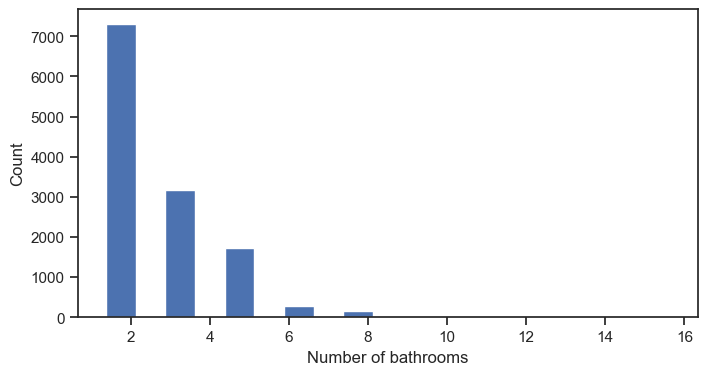

In [66]:
plt.hist(df.bath,rwidth=0.5, bins=10, range=(1,16))
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

* Majority of estates have 2 bathrooms followed by 3, 5 and at max 8

In [67]:
df['bath'].describe()

count    12718.000000
mean         2.708602
std          1.357764
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

* Similar to 'total_sqft', the distribtution of **'bath'** column is highly skwed towards right.
* There are definite outliers in our data as **75th** percentile of data is having **3** as number of bathrooms and max value equal to **40**.
* we need to change datatype of the column to integer as it is not float datatype.
* later on we would be applying log transformation on the column to remove the skewness after bivariate analysis, to understand the relationship of the column with **target** variable.

<AxesSubplot: >

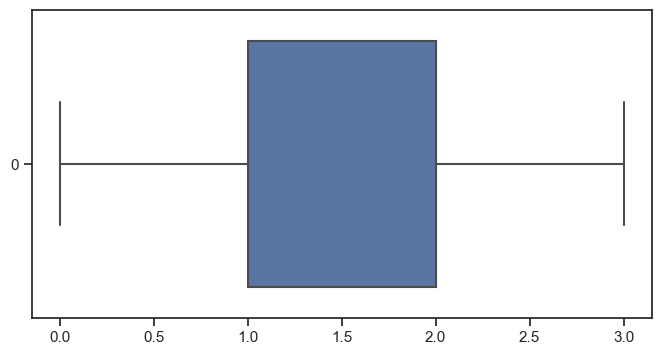

In [68]:
# 3: balcony

plt.figure(figsize=(8,4))
sns.boxplot(df['balcony'], orient='h')

<AxesSubplot: xlabel='balcony', ylabel='Count'>

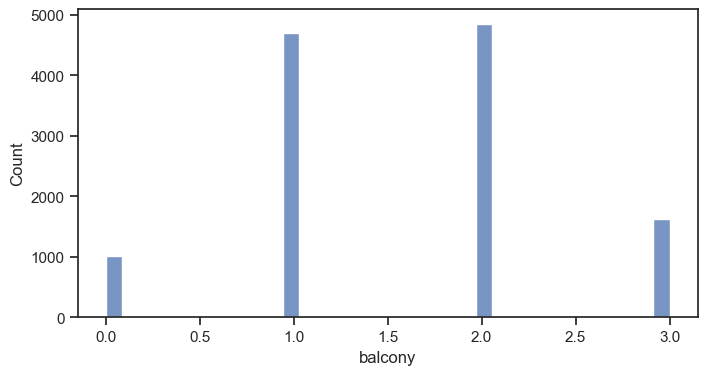

In [69]:
sns.histplot(df['balcony'])

In [70]:
df['balcony'].describe()

count    12186.000000
mean         1.582308
std          0.822536
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [71]:
df['balcony'].isnull().sum()

605

* Distribution for the column is **normal**
* we would be imputing the missing values (605), with 300 values as 1 balcony and rest as 2 balcony.

<AxesSubplot: >

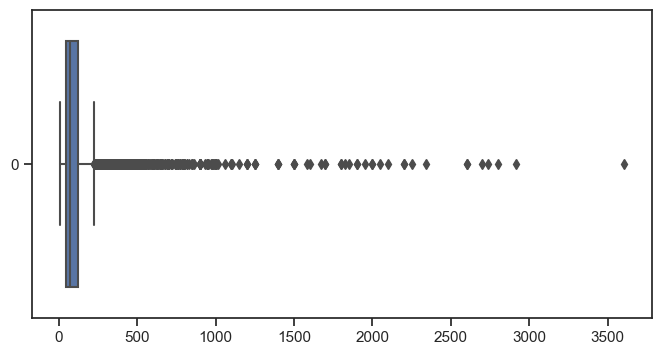

In [72]:
# 4. Price

plt.figure(figsize=(8,4))
sns.boxplot(df['price'], orient='h')

<AxesSubplot: xlabel='price', ylabel='Count'>

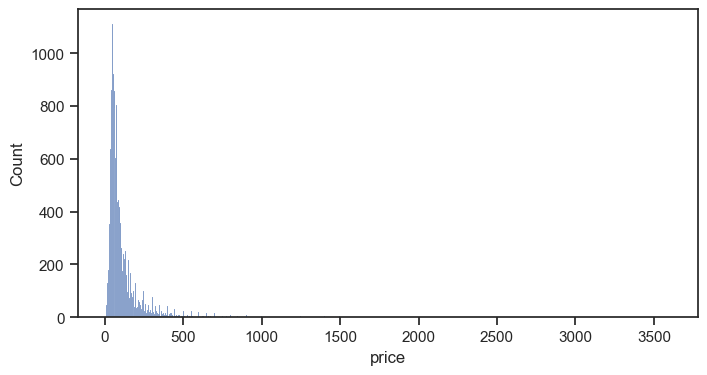

In [73]:
sns.histplot(df['price'])

* Target variable is highly skewed towards right, we would be performing log transform later to remove skewness. 
* Above step would only be implemented for distnace based algorithms like Linear Regression.

***
***BIVARIATE ANALYSIS***
***

*It can be done in three ways:*
* Numerical-Numerical
* Numerical-Categorical
* Categorical-Categorical

In [74]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [75]:
df.dtypes

area_type        object
availability     object
location         object
size              int64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

<u>**Numerical-Numerical**</u>

<Figure size 500x500 with 0 Axes>

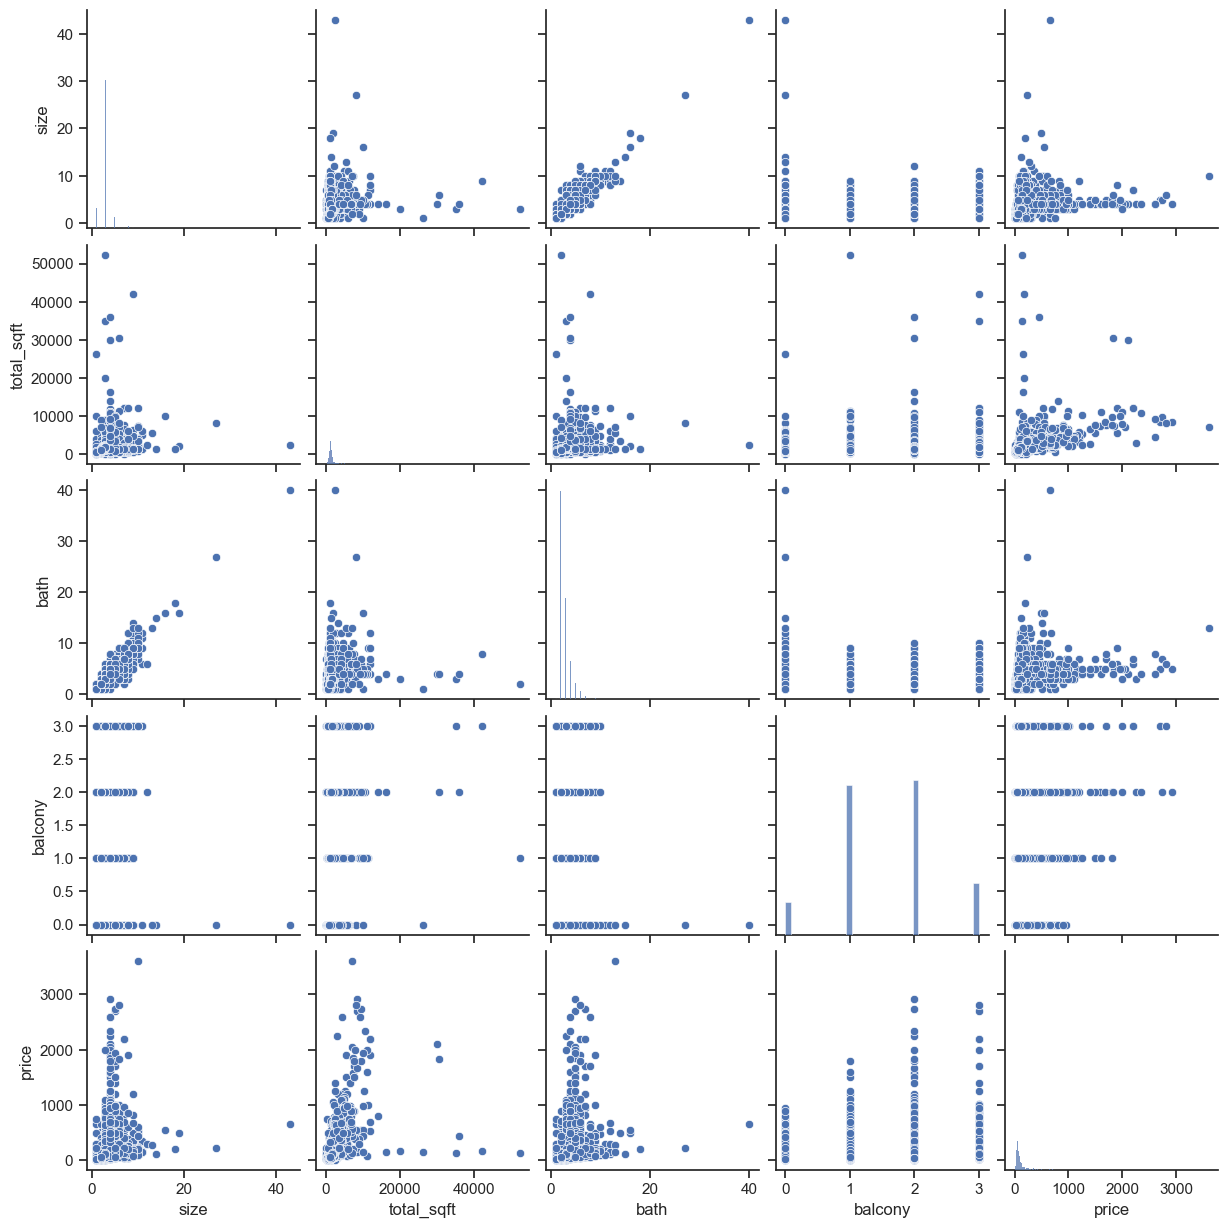

In [76]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

<AxesSubplot: >

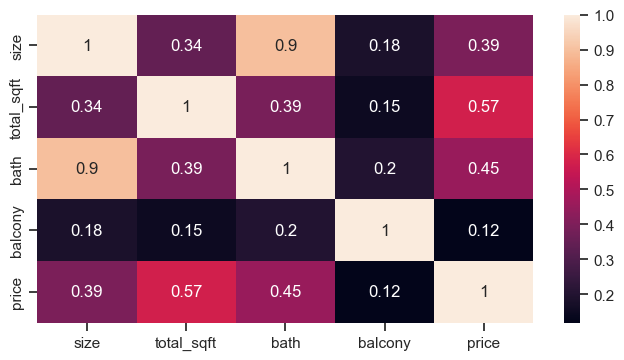

In [77]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* *from first glance at pairplot, it can be observed that there is a linear relationship between many variables such as **bath and size**, **bath and price**, **total_sqft and price**, **size and bath** etc.*
* *From heatmap, this correlation (measure of linearity) can be confirmed*
* *Correlation between **bath and size** is **0.9** which may lead to multicollinearity, if a distance based algorithm is used to make predictions.*

<u>**Numerical-Categorical**</u>

In [78]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [79]:
num_columns = ['bath', 'balcony','total_sqft', 'price']
cat_columns = ['area_type', 'availability', 'size','location', 'society']

In [80]:
import warnings                     ## Ignoring unncessary warnings from the output
warnings.filterwarnings('ignore')

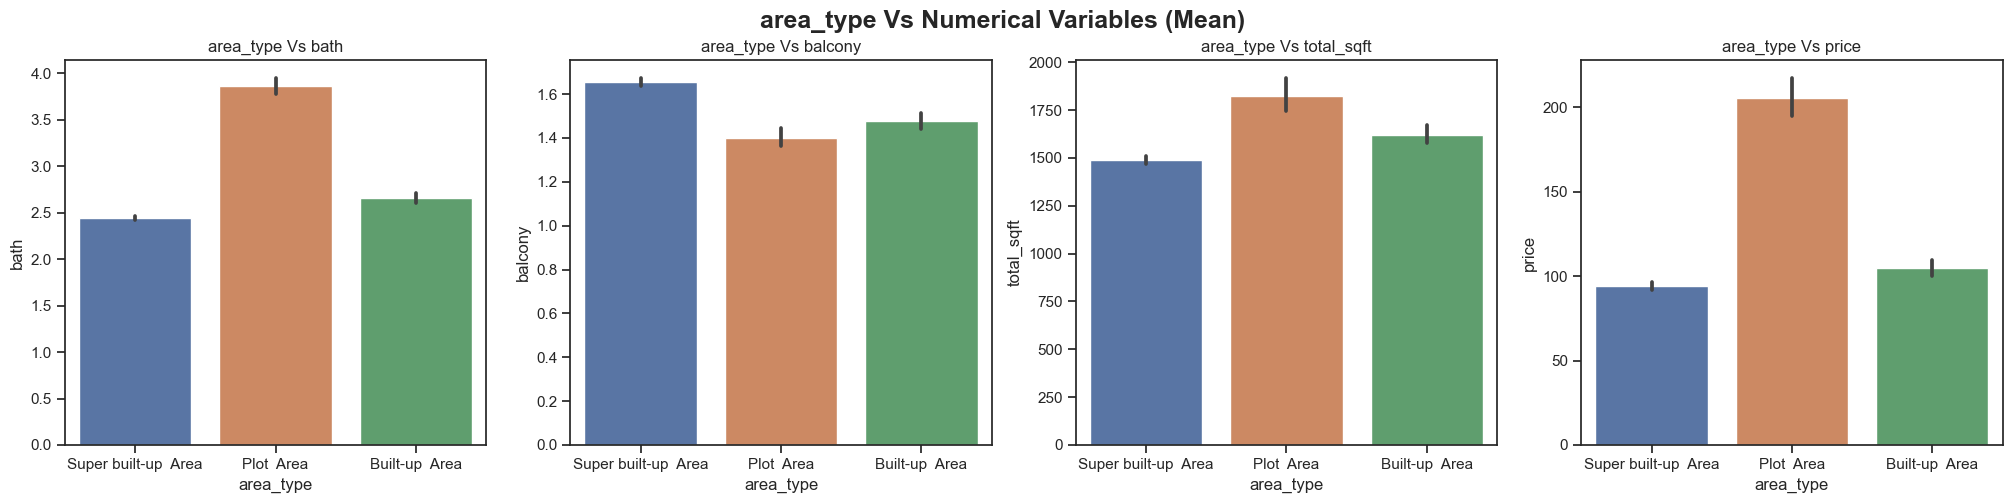

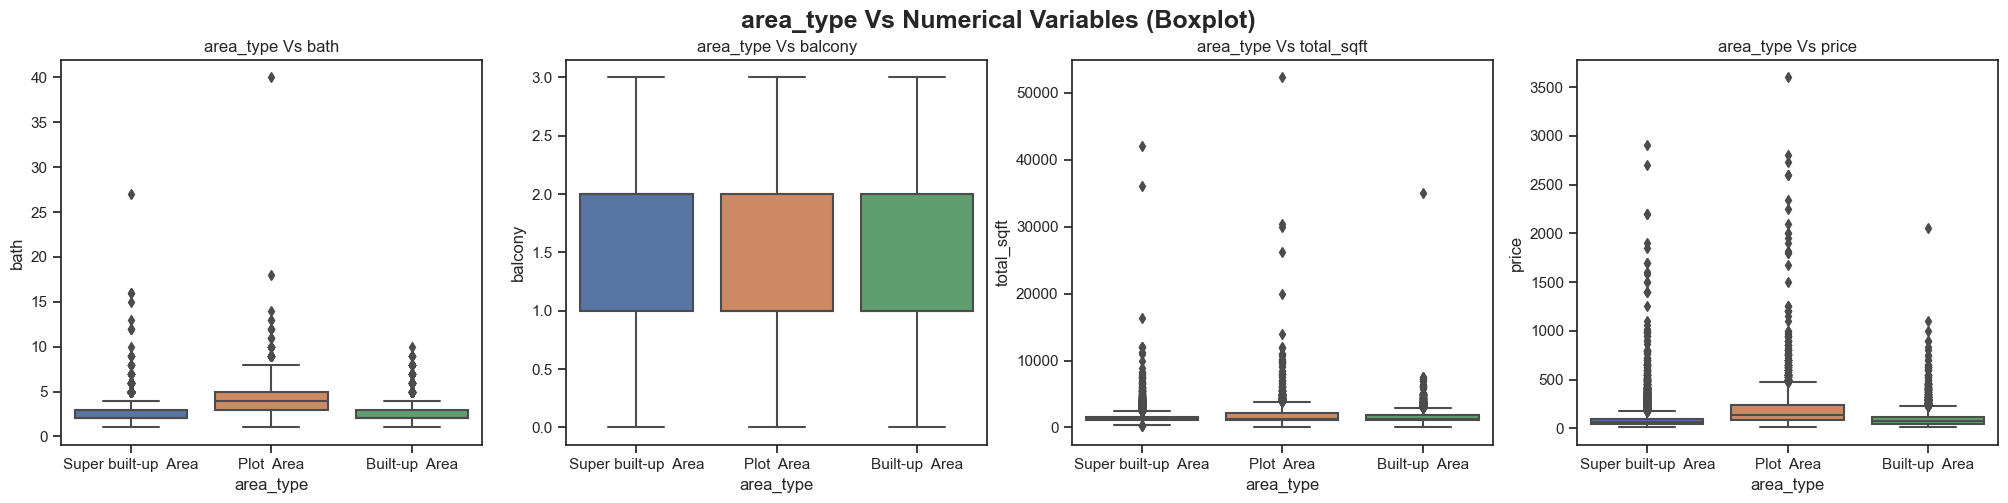

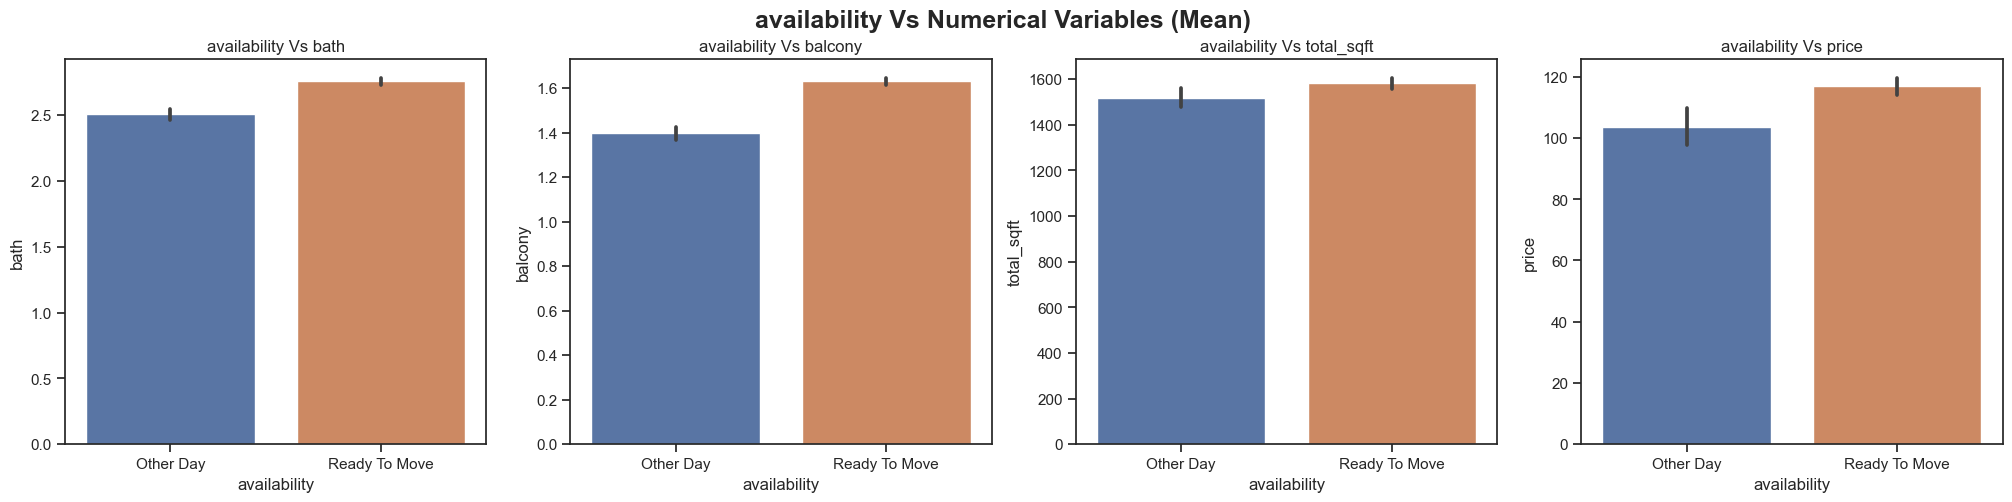

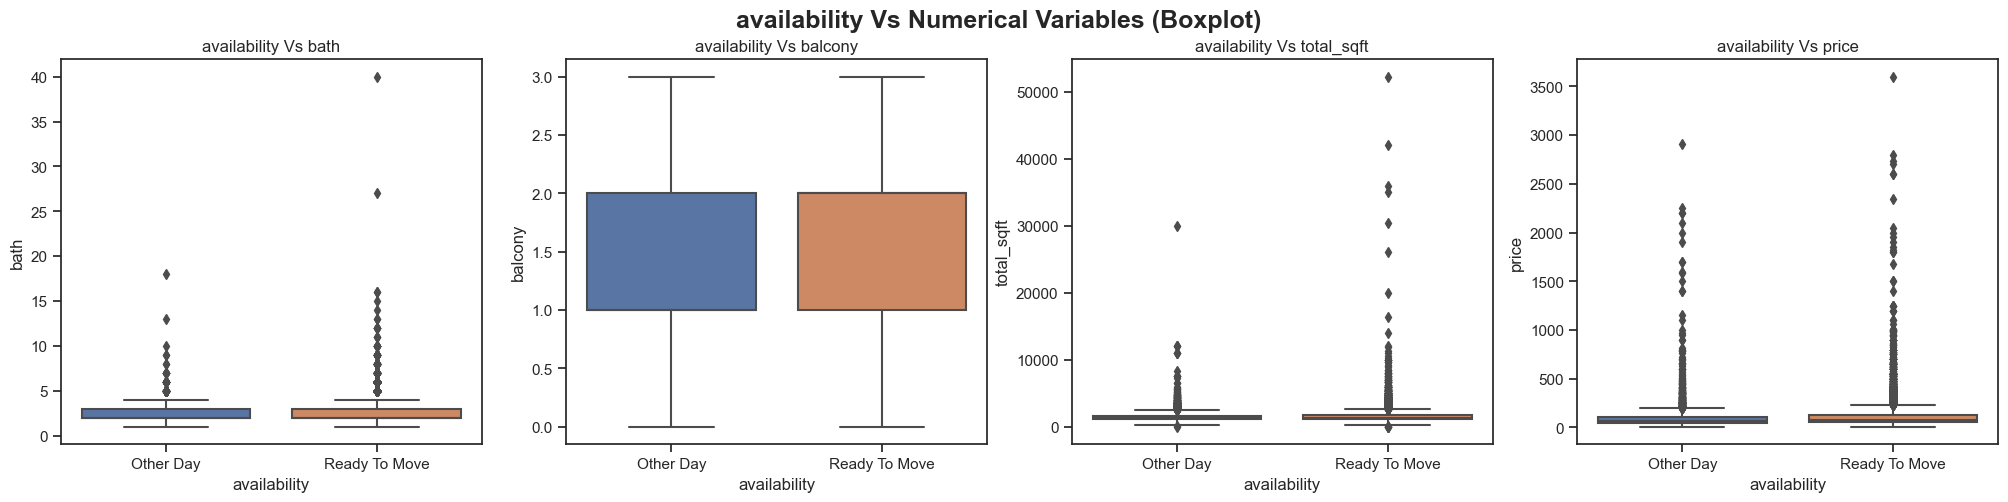

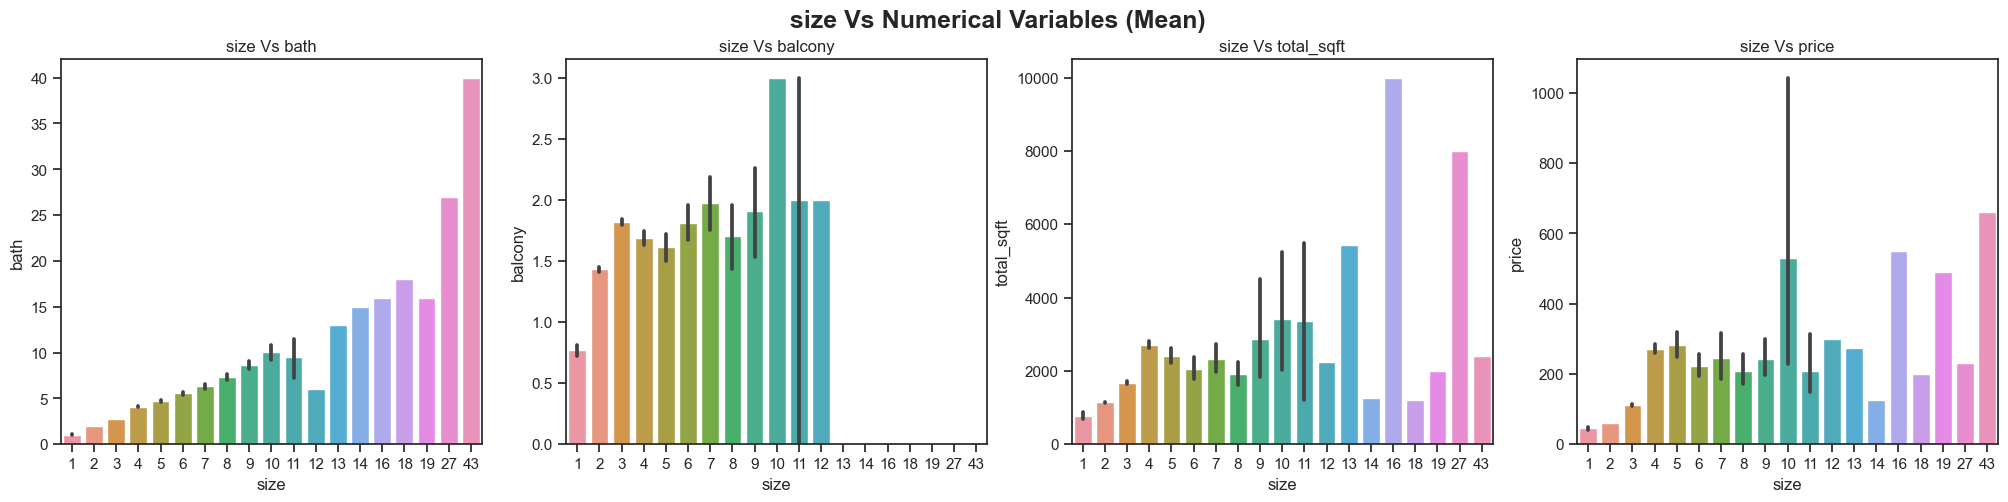

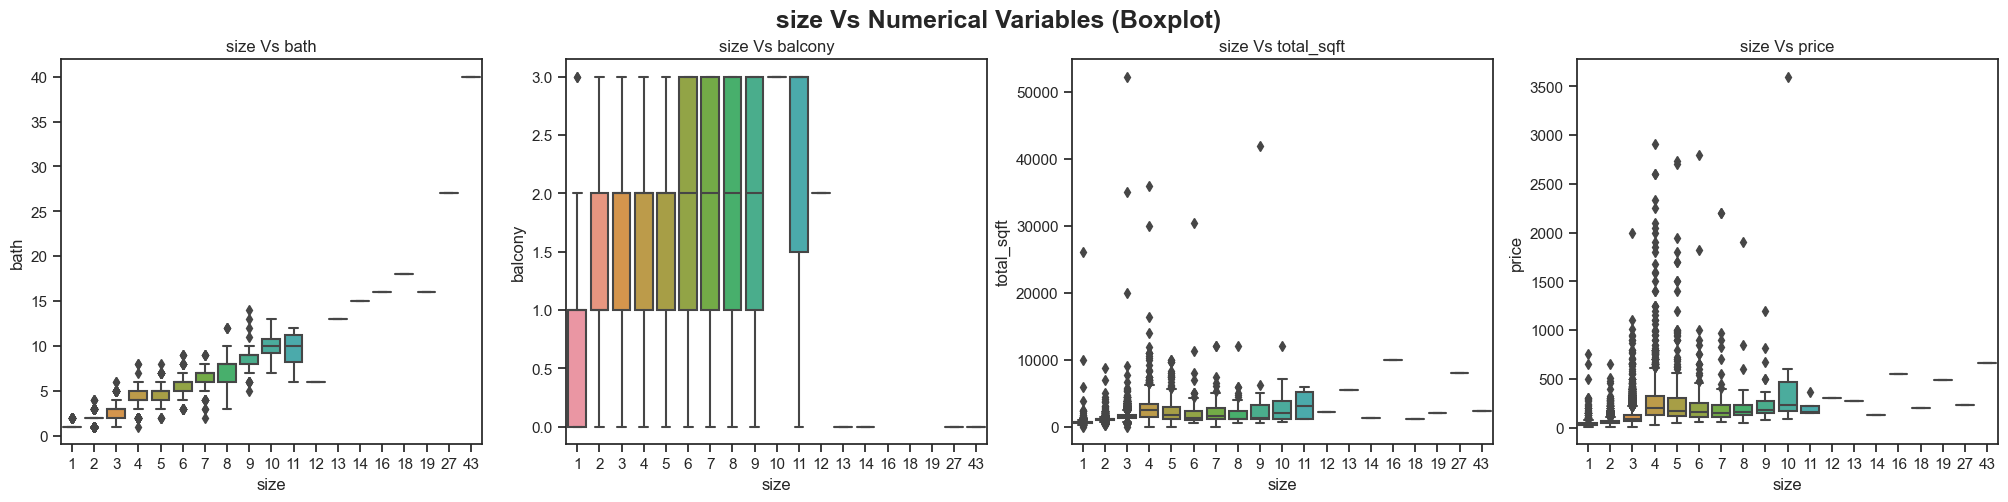

In [81]:
num_columns = ['bath', 'balcony','total_sqft', 'price']               ## Look more on this tomorrow
cat_columns = ['area_type', 'availability', 'size']


for j in range(len(cat_columns)):
                                                           ## Estimator = Mean
    plt.figure(figsize=(25,5))
    for i in enumerate(num_columns):
        plt.suptitle(f'{cat_columns[j]} Vs Numerical Variables (Mean)', size=18, weight='bold')
        plt.subplot(1,4,i[0]+1)
        sns.barplot(df, x=cat_columns[j], y=num_columns[i[0]],estimator='mean')         # Estimator = Mean
        plt.subplot(1,4,i[0]+1).title.set_text(f'{cat_columns[j]} Vs {num_columns[i[0]]}')
    
    
                                                           ## For Boxplots ##    
    plt.figure(figsize=(25,5))
    for i in enumerate(num_columns):
        plt.suptitle(f'{cat_columns[j]} Vs Numerical Variables (Boxplot)', size=18, weight='bold')
        plt.subplot(1,4,i[0]+1)               # (numer of row, columns, position)
        sns.boxplot(df, x=cat_columns[j], y=num_columns[i[0]])
        plt.subplot(1,4,i[0]+1).title.set_text(f'{cat_columns[j]} Vs {num_columns[i[0]]}')

In [82]:
## Performing ANOVA test 

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ area_type', data=df).fit()

# Print the ANOVA table (One way ANOVA as we are using one categorical and one numerical variable)
anova_table = sm.stats.anova_lm(model, typ=2)    # Type=2 as our categories in area_type have different count
print(anova_table)

                 sum_sq       df           F         PR(>F)
area_type  2.078594e+07      2.0  487.373341  1.036304e-204
Residual   2.726970e+08  12788.0         NaN            NaN


* But we know that price is **not normally distributed** so, it would be good idea to search for a test which works even when the normality assumption is voilated.
* We are going to use **Kruskal-Wallis Test**, to further confirm our hypothesis.

In [83]:
from scipy.stats import kruskal        

groups = [group['price'] for name, group in df.groupby('area_type')]
kw_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test")
print(f"KW Statistic: {kw_statistic}")
print(f"P-Value: {p_value}")

Kruskal-Wallis Test
KW Statistic: 1399.401968072428
P-Value: 1.3296080957686871e-304


* As p-value for area_type < 0.05, therefore we can see that "area type" is <u>an important feature in predicting our target, **price** </u>

In [84]:
## Performing ANOVA test 
model = ols('total_sqft ~ area_type', data=df).fit()

# Print the ANOVA table (One way ANOVA as we are using one categorical and one numerical variable)
anova_table = sm.stats.anova_lm(model, typ=2)    # Type=2 as our categories in area_type have different count
print(anova_table)

                 sum_sq       df          F        PR(>F)
area_type  1.957782e+08      2.0  62.480524  9.925987e-28
Residual   2.003514e+10  12788.0        NaN           NaN


* We know that total_sqft has some missing values, therefore we would not be able to use "Krushal-Wallis Test", it would be good idea to remove them first, to further confirm the results from ANOVA test.

In [85]:
df_1 = df.copy()

df_1 = df_1.dropna(subset=['total_sqft'])      # drop rows where 'total_sqft' column is null

# already imported krushal from scipy       

groups = [group['total_sqft'] for name, group in df_1.groupby('area_type')]
kw_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test")
print(f"KW Statistic: {kw_statistic}")
print(f"P-Value: {p_value}")

Kruskal-Wallis Test
KW Statistic: 4.157528197857573
P-Value: 0.12508470903340185


In [86]:
df['area_type'].value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              2076
Name: area_type, dtype: int64

<AxesSubplot: xlabel='total_sqft', ylabel='Density'>

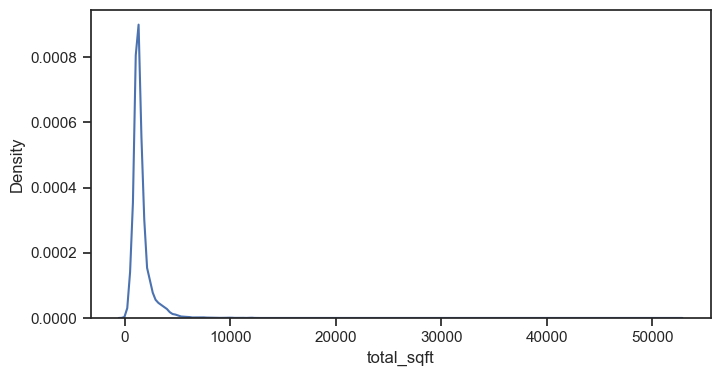

In [87]:
sns.kdeplot(data=df, x='total_sqft')

In [88]:
df[['balcony']].isnull().sum()/len(df)*100

balcony    4.729888
dtype: float64

In [89]:
df['balcony'].describe()

count    12186.000000
mean         1.582308
std          0.822536
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [90]:
df['balcony'].mode()

0    2.0
Name: balcony, dtype: float64

- It makes more sense to impute missing values in the 'balcony' column with **mode**, since it is a discrete numerical variable.
- Moreover, it does not make sense to impute with values such as 1.58 balconies as it does not make sense, to have such value.

- **We would be repeating the imputation steps for train data on test data also.**

In [91]:
df[df['balcony'].isnull()]

# first, we replace all NaN values with mode and then changing datatype of the column

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,Other Day,Old Airport Road,4,Jaades,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,Brway G,3300.0,4.0,NaN,600.00
9,Plot Area,Ready To Move,Other Location,6,NaN,1020.0,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3,Other Society,1925.0,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2,Other Society,1296.0,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Other Location,7,NaN,1400.0,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Other Location,6,NaN,1200.0,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Other Location,4,NaN,1200.0,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3,IBityin,1675.0,3.0,NaN,92.13


In [92]:
test[test['balcony'].isnull()].shape    ## 67 missing values

(67, 9)

In [93]:
df['balcony'].fillna(df['balcony'].mode()[0], inplace=True)

In [94]:
## Repeating for test also
test['balcony'].fillna(df['balcony'].mode()[0], inplace = True)

In [95]:
df['balcony'] = df['balcony'].astype('int64')    # As float consumes more memory and balcony is anyways integer value not float

In [96]:
test['balcony'] = test['balcony'].astype('int64') 

In [97]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [98]:
## Performing ANOVA test  (on Balcony)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ balcony', data=df).fit()

# Print the ANOVA table (One way ANOVA as we are using one categorical and one numerical variable)
anova_table = sm.stats.anova_lm(model, typ=2)    # Type=2 as our categories in area_type have different count
print(anova_table)

                sum_sq       df           F        PR(>F)
balcony   4.482717e+06      1.0  198.371672  1.021347e-44
Residual  2.890003e+08  12789.0         NaN           NaN


- Since, the p-value is lower than 0.05, **we fail to accept the null hypothesis that number of balcony is not an important variable in predicting price (target).**

In [99]:
df_1 = df.copy()            # (on number of bathrooms)

df_1 = df_1.dropna(subset=['bath'])      # drop rows where 'bath' column is null

# Separate the discrete numerical variable and the continuous numerical variable
discrete_var = df_1['bath']
continuous_var = df_1['price']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*[continuous_var[discrete_var == i] for i in set(discrete_var)])

# Print the results
print('Kruskal-Wallis Test')
print('Statistic:', statistic)
print('p-value:', p_value)

Kruskal-Wallis Test
Statistic: 6582.6538161390035
p-value: 0.0


- Since, the p-value is lower than 0.05, **we fail to accept the null hypothesis that number of bathrooms is not an important variable in predicting price (target).

In [100]:
df['bath'].describe()

count    12718.000000
mean         2.708602
std          1.357764
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [101]:
df['bath'].mode()

0    2.0
Name: bath, dtype: float64

In [102]:
df[df['bath'].isnull()]      # Rows where number of bathrooms is null

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,Other Day,Devanahalli,4,Other Society,3210.0,NaN,2,192.000
81,Built-up Area,Other Day,Hennur Road,4,Other Society,3203.5,NaN,2,224.500
224,Super built-up Area,Other Day,Devanahalli,3,Other Society,1630.0,NaN,2,74.820
344,Super built-up Area,Other Day,Kanakpura Road,1,PrarePa,525.0,NaN,2,21.530
579,Plot Area,Other Day,Sarjapur Road,2,Other Society,1800.0,NaN,2,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,Other Day,Kanakpura Road,1,PrarePa,525.0,NaN,2,27.000
11569,Plot Area,Other Day,Hosur Road,2,Other Society,1350.0,NaN,2,8.440
12768,Built-up Area,Other Day,Other Location,5,Other Society,3210.0,NaN,2,353.000
12861,Super built-up Area,Other Day,KR Puram,4,Other Society,2283.0,NaN,2,121.000


In [103]:
test[test['bath'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
151,Plot Area,Other Day,Other Location,2,Other Society,1600.0,NaN,2,NaN
387,Super built-up Area,Other Day,Binny Pete,4,Other Society,2817.5,NaN,2,NaN
1155,Super built-up Area,Other Day,Thanisandra,4,Bhe 2ko,2259.0,NaN,2,NaN
1160,Plot Area,Other Day,Hosa Road,2,Other Society,2300.0,NaN,2,NaN
1292,Built-up Area,Other Day,Gottigere,4,Other Society,3238.5,NaN,2,NaN


In [104]:
# Since, number of bathrooms is a descrete numerical variable, we will impute the missing values with the mode value
df['bath'].fillna(df['bath'].mode()[0], inplace=True)  

In [105]:
test['bath'].fillna(test['bath'].mode()[0], inplace = True)

In [106]:
df['bath'] = df['bath'].astype('int64') # As float consumes more memory and bathrooms is anyways integer value not float

In [107]:
test['bath'] = test['bath'].astype('int64')

In [108]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [109]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               0
society          617
total_sqft         0
bath               0
balcony            0
price           1447
dtype: int64

* **Number of bathrooms is significantly more in Plot Area** than in other area types.
* Similar is true for price, i.e., **Average as well as Median price for Plot Area type estates is more than other two categories.**
* Other variables such as **number of balcony and total square feet of area** do not look significantly different for area types.
* Boxplots for respective area types are highly skewed towards right (positive skweness)
* As the **size increases the number of bathrooms also increases** in real estates. Similar is **true for price (target)** but it is not very linear compared to number of bathrooms.

* In size Vs price (boxplot), it can be observed there are **too many outliers at 4BHK, basically variability is more compared to other sizes of estates**.

* Also, **availability is not that important feature** as it has no siginificant relationship to any variable (even the target)
* **<u>!!!!!!!!!!!PERFORM HYPOTHESIS TESTING!!!!!!!!!!!</u>**, for further confirmation of claim 3


<u>**Categorical-Categorical**</u>

In [110]:
cat_cols.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [111]:
num_cols.columns

Index(['bath', 'balcony', 'price'], dtype='object')

<AxesSubplot: xlabel='total_sqft', ylabel='price'>

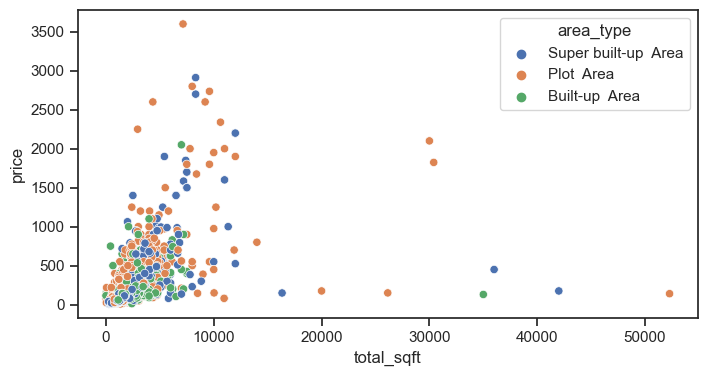

In [112]:
sns.scatterplot(data=df, x='total_sqft',y='price', hue='area_type')

<AxesSubplot: xlabel='price', ylabel='Density'>

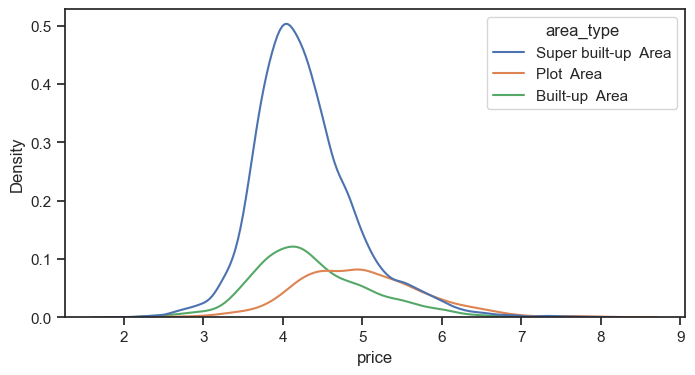

In [113]:
sns.kdeplot(data=df, x=np.log(df["price"]), hue="area_type")

In [114]:
np.exp(4)

54.598150033144236

- From the above kdeplot it can be observed that for approximately **55 lakh (INR)**, there is a **higher probability of finding "Super-builtup Area"** estate in bangalore than the other two area types.
- It can be infered that there are more **55 lakh** "Super built-up" estates than plot area and Built-up area by a probability of atleast 5 times of 'plot area' and 'Built-up area' (individually) for "Super-built up" area type.

<h1 align="center"><font size="5">FEATURE ENGINEERING</font></h1> 

We have good idea of our variables and there relationships now, so we can build new features out of the existing ones and check their correlation with our target (**Price**).

In [115]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']   # As 1 unit in price = 1 lakh in Indian Currency
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Other Day,Electronic City Phase II,2,Other Society,1056.0,2,1,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2,1,51.00,4250.000000


In [116]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft'],
      dtype='object')

<AxesSubplot: >

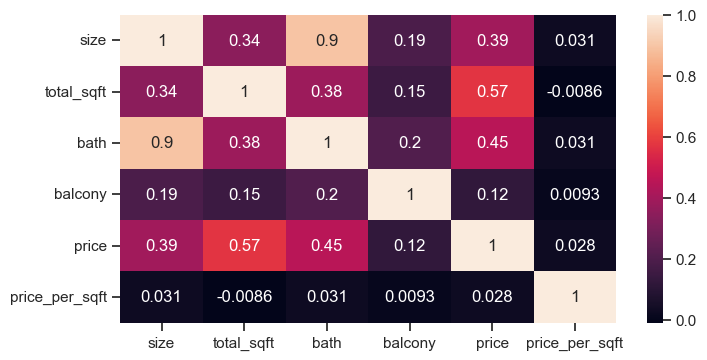

In [117]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [118]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5328
total_sqft           0
bath                 0
balcony              0
price                0
price_per_sqft       0
dtype: int64

In [119]:
df['society'].value_counts()

Other Society    5132
GrrvaGr            68
PrarePa            63
Sryalan            56
Prtates            54
                 ... 
SLaceda            11
Prionad            11
ProdsWe            11
Pronyt             11
Alestrb            11
Name: society, Length: 114, dtype: int64

- As 'society' column has **too many missing values (42%)** and also the categories are very large, we are dropping it.
- Also, we are dropping availability as it is not that significant.

In [120]:
df = df.drop(["society", "availability"], axis = "columns")

In [121]:
# Dropping "Society" and "availability" from test data also

test = test.drop(['society','availability'], axis = 'columns')

In [122]:
df.isnull().sum()

area_type         0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [123]:
test.isnull().sum()

area_type        0
location         0
size             0
total_sqft       0
bath             0
balcony          0
price         1447
dtype: int64

- Now, we have no missing values in our data (train and test)

In [124]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


In [125]:
test.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Brookefield,2,1225.0,2,2,NaN
1,Plot Area,Akshaya Nagar,9,2400.0,9,2,NaN
2,Plot Area,Hennur Road,4,1650.0,5,2,NaN
3,Super built-up Area,Kodichikkanahalli,3,1322.0,3,1,NaN
4,Super built-up Area,Konanakunte,2,1161.0,2,1,NaN


***
*OUTLIER TREATMENT*
***

* Sometime, the values of the numerical column seem to be "not an outlier" but inadequate. For example, in real estate typically 1 Bedroom apartment has a threshold area of **300 sqft**. We would use this threshold to find the rows which do not follow this threshold.

In [126]:
outliers = df[df['total_sqft']/df['size'] < 300]      
outliers

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,Other Location,6,1020.0,6,2,370.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9,2,200.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4,1,150.0,10660.980810
68,Plot Area,Devarachikkanahalli,8,1350.0,7,0,85.0,6296.296296
70,Plot Area,Other Location,3,500.0,3,2,100.0,20000.000000
...,...,...,...,...,...,...,...,...
13221,Plot Area,Other Location,9,1178.0,9,1,75.0,6366.723260
13277,Plot Area,Other Location,7,1400.0,7,2,218.0,15571.428571
13279,Plot Area,Other Location,6,1200.0,5,2,130.0,10833.333333
13281,Plot Area,Margondanahalli,5,1375.0,5,1,125.0,9090.909091


- There are 742, such records are inconsistent or inadequecies in our data. We have two options: **Either we can replace them with some other sensible value or simply drop these records.**
- We would go with latter option since the column, i.e., **total_sqft** has highest degree of correlation with our target variable. It would be much better to work with consistent data than a data whose inadequecies have been replaced by less inadequate value. 

In [127]:
df_1 = df[~(df['total_sqft']/df['size'] < 300)]      # Removing all such rows from data
df_1.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


* Let us also have a look at price_per_sqft column and have a basic understanding of prices per sqft.

In [128]:
df_1['price_per_sqft'].describe()

count     12049.000000
mean       6372.981150
std        4239.136960
min         267.829813
25%        4250.000000
50%        5333.333333
75%        6978.922717
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

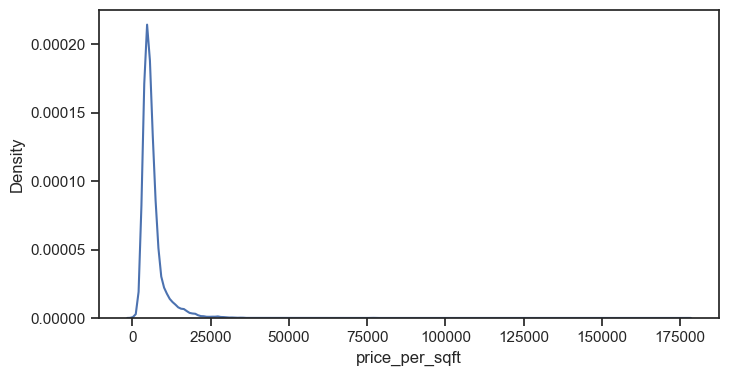

In [129]:
sns.kdeplot(data=df_1, x='price_per_sqft')

* It can be observed that distribution is highly skewed towards right. We can either use **IQR Method** or **Z-Scores** to remove the outliers. 
* Also, as each **location** in data would be having different values for minimum and maximum price, it would be more sensible to remove outlier by location than removing on the basis of overall column statistics.

In [130]:
def remove_pps_outliers(df):
    '''
    Keeps data between ranges mean-2*standard_deviation and mean+2*standard_deviation (95% interval)
    '''
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = subdf['price_per_sqft'].mean()
        std = subdf['price_per_sqft'].std()
        reduced_df = subdf[(subdf['price_per_sqft']>(mean-2*std)) & (subdf['price_per_sqft']<=(mean+2*std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df_2 = remove_pps_outliers(df_1)
df_2.shape

(11548, 8)

<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

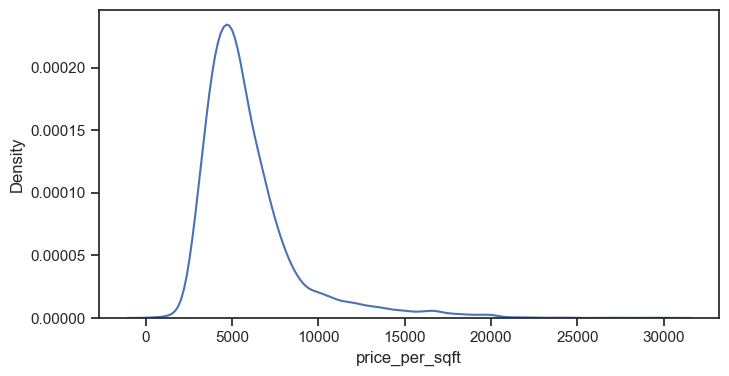

In [131]:
sns.kdeplot(data=df_2, x='price_per_sqft')

In [132]:
df_2['price_per_sqft'].describe()

count    11548.000000
mean      5973.177410
std       2874.091406
min        267.829813
25%       4210.526316
50%       5252.421226
75%       6727.324557
max      30241.935484
Name: price_per_sqft, dtype: float64

* Now, the statistics and distribtuion of the column looks more normal as well as balanced.

In [133]:
df_2[df_2['bath']>df_2['size']+2] 

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
1787,Built-up Area,Chikkabanavar,4,2460.0,7,2,80.0,3252.032520
5977,Built-up Area,Nagasandra,4,7000.0,8,2,450.0,6428.571429
6366,Plot Area,Other Location,9,3300.0,14,2,500.0,15151.515152
6673,Super built-up Area,Other Location,6,11338.0,9,1,1000.0,8819.897689
10231,Super built-up Area,Thanisandra,3,1806.0,6,2,116.0,6423.034330


- We would simply drop the rows above as it is very unlikely to have real estates where the number of bathroom is more than the size of estate (BHK).

In [134]:
df_3 = df_2[~(df_2['bath']>df_2['size']+2)]
df_3.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4,1,428.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3,2,194.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2,3,235.0,12533.333333
3,Plot Area,1st Block Jayanagar,4,2400.0,4,2,450.0,18750.000000
4,Super built-up Area,1st Block Jayanagar,2,1000.0,3,2,60.0,6000.000000


In [135]:
df_3.shape

(11543, 8)